
# Project: Investigate a Dataset (TMDb movie data analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dateset was taken from The Movie Database (TMDb)https://www.themoviedb.org/
<br>In this dataset, each row represent a movie, and columns are the features of the movie.

In this report, I have explored these questions: 
<ol>
<li> Does budget relate to vote average of the movie?</li>
<li> What percent of the movie made no revenue?</li>
<li> Does the average revenue increase over time? </li>
</ol>



In [98]:
# Set up. Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [99]:
# Load data and check general properties.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [100]:
df.info()
df.nunique()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Check for missing value and drop column that not relevant.)

Now the data is loaded. I will make the following changes:
<li> Find the duplicated row, and drop these data. </li>
<li> Drop "homepage" and "imdb_id" column, they are not relevant and have a lot missing value. </li>
<li> Fill row with missing value </li>

In [101]:
# Drop duplicated row
df.duplicated()
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [102]:
# Drop "homepage" and "imdb_id".
df = df.drop('homepage', axis = 1)
df = df.drop('imdb_id', axis = 1)

In [103]:
# Fill row with missing value
df.fillna("no info", inplace = True)
sum(df.duplicated())

0

<a id='eda'></a>

## Exploratory Data Analysis


### Research Question 1 (Does budget relate to vote average of the movie?)

First to get a rough idea of the budget, draw sactter plot to see if there's a pattern. 
Then divide the vote into three bins to find budget in each level of vote.
I use budget_adj becuase it takes care of inflation.


Text(0.5, 1.0, 'vote-budget')

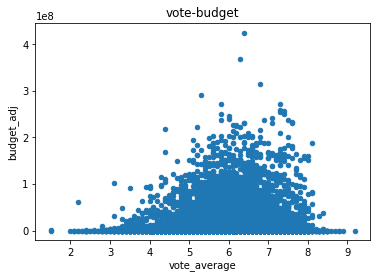

In [104]:
# Visualize using scatter plot
df.plot(x = "vote_average", y = "budget_adj", kind = "scatter");
plt.title("vote-budget")

In [105]:
# Set proper edge and divide the average vote into three categories

df["vote_average"].max(), df["vote_average"].min()
bin_edges = [0.0,3.0,6.0,9.0]
bin_names = ["low","medium","high"]

#create "vote" column
df["vote"] = pd.cut(df["vote_average"], bin_edges, labels = bin_names)
df.head()


,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,high
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,high


In [106]:
# Find the mean budget for each vote
budget_mean = df.groupby("vote")["budget"].mean()


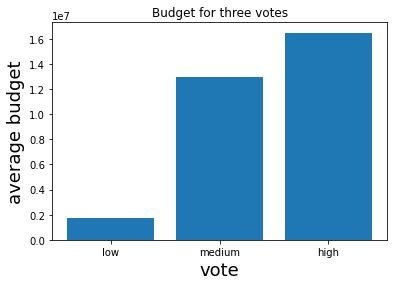

In [107]:
# Visualize
# Add column of the three level of average vote, then plot bar graph

plt.xlabel("vote", fontsize = 18)
plt.ylabel("average budget", fontsize = 18)
plt.bar(bin_names, budget_mean)
plt.title("Budget for three votes")
plt.show()

### Research Question 2  (What is the percent of the movie that made no revenue?)

I notice a lot of movie has revenue 0, so I wonder how much percentage of movie is not making any money.
First seperate the movies by revenue bigger than 0(has revenue) and equal to zero(no revenue)
Then calculate the percentabe using count/total
Finally use pie chart to display the percentage.

In [108]:
# lose_percent = df_lose.id.count()/(df_lose.id.count() + df_win.id.count())
# win_percent = 1 - lose_percent

df_lose = df.query('revenue_adj == 0')
df_win = df.query('revenue_adj > 0')
df_lose.id.count(), df_win.id.count()

(6016, 4849)

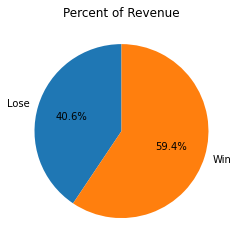

In [109]:
# Pie chart

labels = "Lose", "Win"
sizes = [2855,4176]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Percent of Revenue")
plt.show()

### Research Question 3  (Does the average revenue increase over time?)

I wonder if the movie companies make more money in recent years. I assume the revenue increase over time, but I want to check if my assumption is correct.

First select revenue and release year, then group by release year to calculate the average revenue.

Text(0.5, 1.0, 'Average Revenue over year')

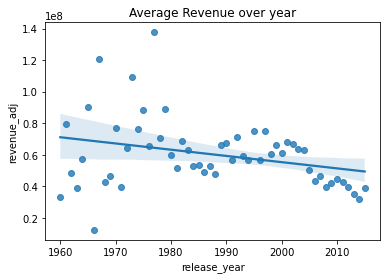

In [168]:
df2 = df[["revenue_adj","release_year"]]
df3 = df2.groupby(["release_year"],as_index=False).mean() # use as_index=False to return a dataframe object
sns.regplot(x = "release_year", y = "revenue_adj", data = df3) # use seaborn to draw regression line
plt.title("Average Revenue over year")

I use these data to draw a time series plot (with regression line). The avergae avenue seems fluctuate before 1980, and gets stable (with slightly decrease) afterwards. I wonder what cause this pattern. So I tried to plot every year instead of average.

Text(0.5, 1.0, 'Revenue over year')

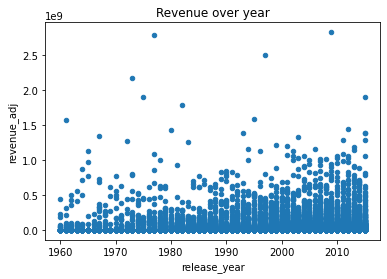

In [165]:
df.plot(x = "release_year", y = "revenue_adj", kind = "scatter")
plt.title("Revenue over year")

This individual movie revenue shows a more complete picture. With time increase, there were more and more movie produced each year. The increased number of movie stablize the revenue, and the movie with little revenue drags down the average, which explains the small average decrease over time.


Text(0.5, 1.0, 'Total Revenue over year')

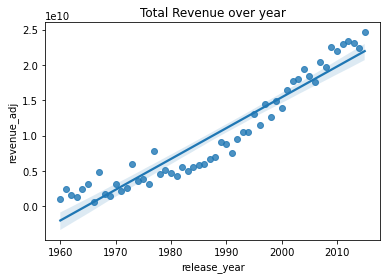

In [169]:
df4 = df2.groupby(["release_year"],as_index=False).sum()
sns.regplot(x = "release_year", y = "revenue_adj", data = df4) 
plt.title("Total Revenue over year")

If I use sum instead of average, I can see there is a strong positive correlation between time and revenue. This shows that the movie industry is making more money overall, however this is more likely due to more movie is made, rather than reveune increase for each movie, like the graph below shows.

Text(0.5, 1.0, 'Number of movie released over year')

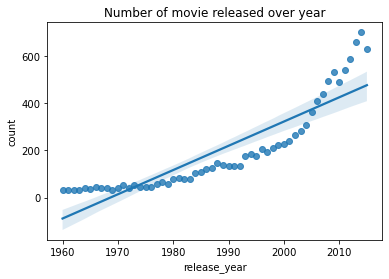

In [175]:
df5 = df2.groupby(["release_year"],as_index=False).count()
df5.columns = ["release_year", "count"]   # Rename columns to avoid confusion
sns.regplot(x = "release_year", y = "count", data = df5) 
plt.title("Number of movie released over year")


# <a id='conclusions'></a>
## Conclusions
<br>
Result: our data suggested that
<ol>
<li> The movie with high vote has high budget, and movie with low vote has low budget.</li>
<li> Almost a half of the movie does not make revenue.</li>
<li> Even though 
</ol>
<br>
Limitation: there are couple of limitation of our data
<ol>
<li>Drooping missing value might cause unintentional bias.
<li>Our analysis is based on given TMDb dataset. Some information is missing. 
</ol>